In [42]:
#add matplotlib inline magic command and dependencies
%matplotlib inline
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [44]:
#read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [45]:
#read the ride data file and store it in ta pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [46]:
#get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [47]:
#get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [48]:
#get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [49]:
#get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [50]:
#get the number of data points from the city types
print(
    sum(city_data_df["type"]=="Urban")," Urban ",
    sum(city_data_df["type"]=="Suburban")," Suburban ",
    sum(city_data_df["type"]=="Rural")," Rural ")

66  Urban  36  Suburban  18  Rural 


In [51]:
#get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [52]:
#get the colums and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [53]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [54]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [55]:
#create the city type DataFrames
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [56]:
#get the number of rides for each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [57]:
#get average fare for each city in each type
#urban average fares by city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
#suburban average fares by city
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
#rural average fares by city
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [58]:
#get the average number of drivers for each city of each type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

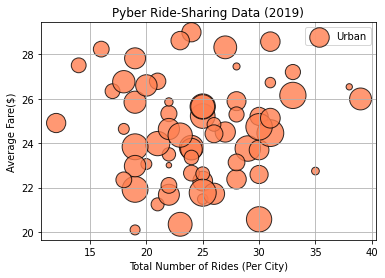

In [59]:
#build the scatter plots for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

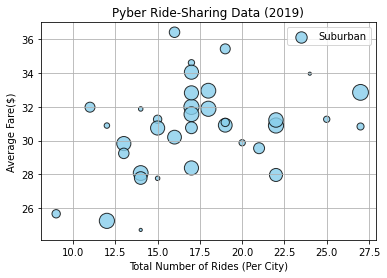

In [60]:
#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=suburban_driver_count*10, c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

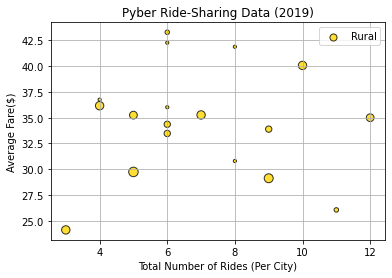

In [61]:
#build the scatter plots for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=rural_driver_count*10, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

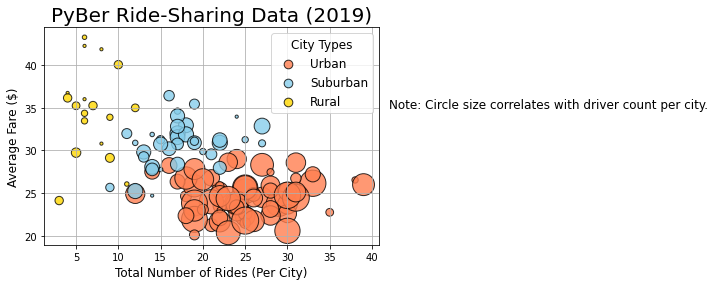

In [72]:
#add the scatter charts for each type of city into one
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

#format graph
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

#incorporate note on circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)
plt.savefig("analysis/fig1.png")

In [76]:
#get summary statistics
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [112]:
#get summary statistics
#urban_ride_count.describe()
#suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [80]:
#calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [82]:
#calculate the medians
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [83]:
#calculate the modes
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [84]:
#import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [87]:
#calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode fo the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode fo the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [89]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [96]:
#get the fares for the city types
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [94]:
#calculate measures of central tendency for the average fare for the cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.640000.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.750000.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.050000.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [109]:
#get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [106]:
#calculate measures of central tendency for driver count
mean_urban_drivers = np.mean(urban_drivers)
print(f"mean urban drivers: {mean_urban_drivers:.2f}")
median_urban_drivers = np.median(urban_drivers)
print(f"median urban drivers: {median_urban_drivers}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"mode urban drivers: {mode_urban_drivers}")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"mean suburban drivers: {mean_suburban_drivers:.2f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"median suburban drivers: {median_suburban_drivers}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"mode suburban drivers: {mode_suburban_drivers}")
mean_rural_drivers = np.mean(rural_drivers)
print(f"mean rural drivers: {mean_rural_drivers:.2f}")
median_rural_drivers = np.median(rural_drivers)
print(f"median rural drivers: {median_rural_drivers}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"mode rural drivers: {mode_rural_drivers}")

mean urban drivers: 36.68
median urban drivers: 37.0
mode urban drivers: ModeResult(mode=array([39], dtype=int64), count=array([86]))
mean suburban drivers: 13.71
median suburban drivers: 16.0
mode suburban drivers: ModeResult(mode=array([20], dtype=int64), count=array([79]))
mean rural drivers: 4.30
median rural drivers: 4.0
mode rural drivers: ModeResult(mode=array([1], dtype=int64), count=array([32]))


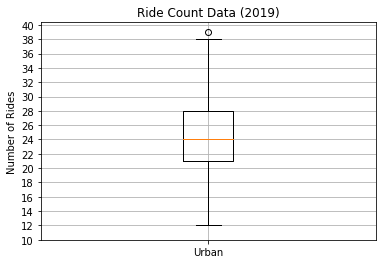

In [107]:
#create a box-and-whisker plot for the urban cities ride count
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#add title, y-axis label, grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2))
ax.grid()

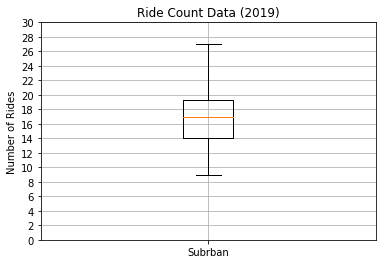

In [111]:
#create a box-and-whisker plot for the suburban cities ride count
x_labels=["Subrban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#add title, y-axis label, grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,31,step=2))
ax.grid()

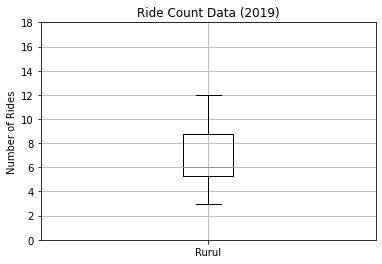

In [113]:
#create a box-and-whisker plot for the rural cities ride count
x_labels=["Rurul"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#add title, y-axis label, grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 20,step=2))
ax.grid()

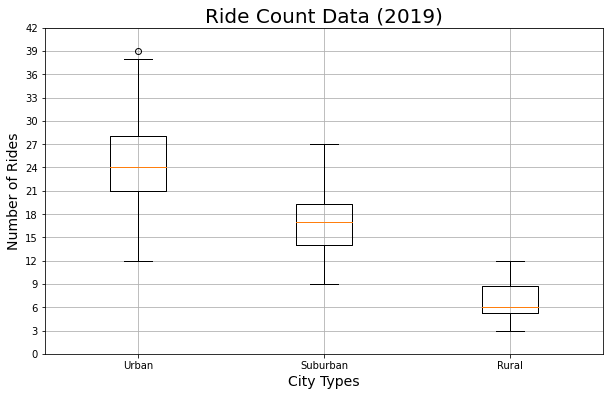

In [114]:
#combine into one
x_labels=["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3))
ax.grid()
plt.savefig("analysis/fig2.png")

In [115]:
#get the city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

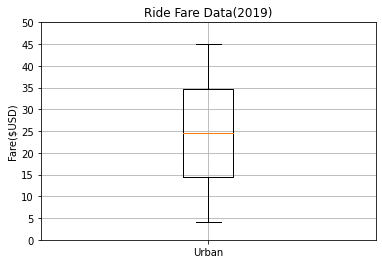

In [119]:
#create a box-and-whisker plot for the urban fare data
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#add the title, y-axis label and grid
ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
print("Summary Statistics")
urban_fares.describe()

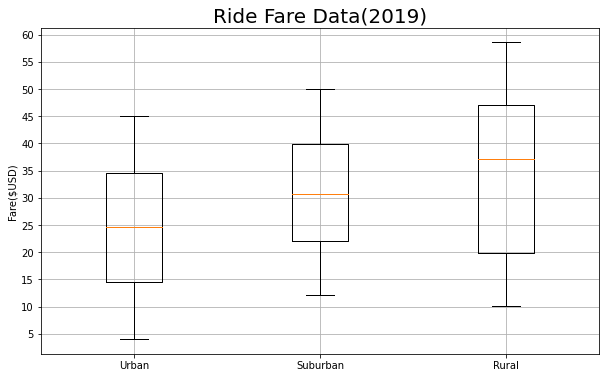

In [132]:
#create a combined box-and-whisker
x_labels=["Urban","Suburban","Rural"]
ride_fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax=plt.subplots(figsize=(10, 6))
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 65, step=5))
ax.grid()
ax.set_title("Ride Fare Data(2019)",fontsize=20)
ax.boxplot(ride_fare_data, labels=x_labels)

plt.savefig("analysis/fig3.png")

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

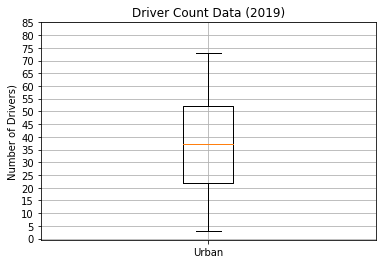

In [133]:
#creat the box-and-whisker plot for the urban driver count dat
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
#add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers)")
ax.set_yticks(np.arange(0,90,step=5))
ax.grid()
print("Summary Statistics")
urban_drivers.describe()

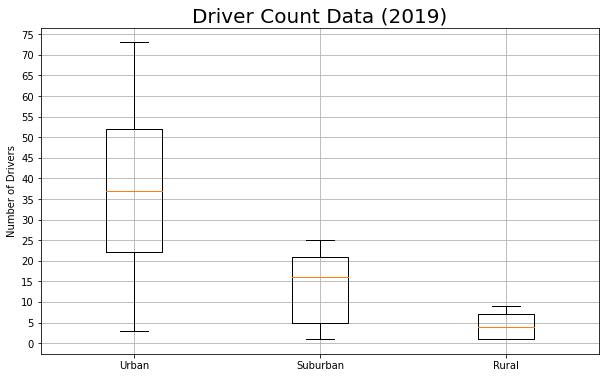

In [135]:
#create a combined box-and-whisker
x_labels=["Urban","Suburban","Rural"]
driver_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax=plt.subplots(figsize=(10, 6))
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5))
ax.grid()
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.boxplot(driver_data, labels=x_labels)

plt.savefig("analysis/fig4.png")

In [136]:
#get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [137]:
#get the sum of all fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [138]:
#calculate the percentage of fare for each city type
type_percents=100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

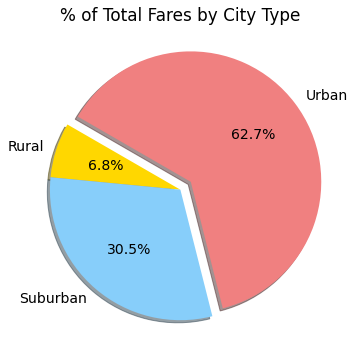

In [153]:
#import mpl to change plot configurations using rcparams
import matplotlib as mpl
#build the percentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(
    type_percents,
    labels=["Rural","Suburban","Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0,0,0.1],
    autopct="%1.1f%%",
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#change the default font size from 10 to 14
mpl.rcParams["font.size"]=14
plt.savefig("analysis/fig5.png")    

In [155]:
#calculate the percentage of rides for each city type
ride_percents=100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()

In [ ]:
#build the percentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(
    type_percents,
    labels=["Rural","Suburban","Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0,0,0.1],
    autopct="%1.1f%%",
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#change the default font size from 10 to 14
mpl.rcParams["font.size"]=14
plt.savefig("analysis/fig5.png")    